<a href="https://colab.research.google.com/github/Suvam7407/GitHub-Projects/blob/master/MultivariateRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd


Saving Housing_Modified.csv to Housing_Modified.csv


In [0]:
#we can check the dataset is loaded or not

df=pd.read_csv("Housing_Modified.csv")
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,one,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,one,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,two,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,one,yes,no,no,no,no,0,no


In [0]:
#check the data exploration
df.columns

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')

In [0]:
#check the dimention
df.shape

(546, 12)

In [0]:
# check the statistical summery of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null object
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64
prefarea    546 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 51.3+ KB


In [0]:
# check dataset has any null value or not
df.isnull().any()

price       False
lotsize     False
bedrooms    False
bathrms     False
stories     False
driveway    False
recroom     False
fullbase    False
gashw       False
airco       False
garagepl    False
prefarea    False
dtype: bool

In [0]:
from sklearn import preprocessing 
lb=preprocessing.LabelBinarizer()
df.driveway=lb.fit_transform(df.driveway)
df.recroom=lb.fit_transform(df.recroom)
df.fullbase=lb.fit_transform(df.fullbase)
df.gashw=lb.fit_transform(df.gashw)
df.airco=lb.fit_transform(df.airco)
df.prefarea=lb.fit_transform(df.prefarea)

In [0]:
#after preprocessing the dataset statistical summery 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null object
driveway    546 non-null int64
recroom     546 non-null int64
fullbase    546 non-null int64
gashw       546 non-null int64
airco       546 non-null int64
garagepl    546 non-null int64
prefarea    546 non-null int64
dtypes: float64(1), int64(10), object(1)
memory usage: 51.3+ KB


In [0]:
# after preprocessing the dataset
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,1,0,1,0,0,1,0
1,38500.0,4000,2,1,one,1,0,0,0,0,0,0
2,49500.0,3060,3,1,one,1,0,0,0,0,0,0
3,60500.0,6650,3,1,two,1,1,0,0,0,0,0
4,61000.0,6360,2,1,one,1,0,0,0,0,0,0


In [0]:
#one hot encoding
#dummy variable
df.stories_=pd.get_dummies((df.stories),prefix="stories")
df=pd.concat([df,df.stories_],axis=1)
del(df["stories"])
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_four,stories_one,stories_three,stories_two
0,42000.0,5850,3,1,1,0,1,0,0,1,0,0,0,0,1
1,38500.0,4000,2,1,1,0,0,0,0,0,0,0,1,0,0
2,49500.0,3060,3,1,1,0,0,0,0,0,0,0,1,0,0
3,60500.0,6650,3,1,1,1,0,0,0,0,0,0,0,0,1
4,61000.0,6360,2,1,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,1,1,0,0,1,0,0,1,0,0,0
542,94000.0,6000,3,2,1,0,0,0,1,0,0,1,0,0,0
543,103000.0,6000,3,2,1,1,0,0,1,1,0,1,0,0,0
544,105000.0,6000,3,2,1,1,0,0,1,1,0,0,0,0,1


In [0]:
#after applying get_dummies summery ofstatistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 15 columns):
price            546 non-null float64
lotsize          546 non-null int64
bedrooms         546 non-null int64
bathrms          546 non-null int64
driveway         546 non-null int64
recroom          546 non-null int64
fullbase         546 non-null int64
gashw            546 non-null int64
airco            546 non-null int64
garagepl         546 non-null int64
prefarea         546 non-null int64
stories_four     546 non-null uint8
stories_one      546 non-null uint8
stories_three    546 non-null uint8
stories_two      546 non-null uint8
dtypes: float64(1), int64(10), uint8(4)
memory usage: 49.2 KB


In [0]:
df.corr()

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_four,stories_one,stories_three,stories_two
price,1.000000,0.535796,0.366447,0.516719,0.297167,0.254960,0.186218,0.092837,0.453347,0.383302,0.329074,0.372281,-0.270058,0.138254,-0.002089
lotsize,0.535796,1.000000,0.151851,0.193833,0.288778,0.140327,0.047487,-0.009201,0.221765,0.352872,0.234782,0.178354,0.054348,0.020567,-0.159612
bedrooms,0.366447,0.151851,1.000000,0.373769,-0.011996,0.080492,0.097201,0.046028,0.160412,0.139117,0.078953,0.145525,-0.509974,0.099150,0.377424
bathrms,0.516719,0.193833,0.373769,1.000000,0.041955,0.126892,0.102791,0.067365,0.184955,0.178178,0.064013,0.281003,-0.250784,0.036027,0.080982
driveway,0.297167,0.288778,-0.011996,0.041955,1.000000,0.091959,0.043428,-0.011942,0.106290,0.203682,0.199378,0.115453,-0.053249,0.073533,-0.047074
recroom,0.254960,0.140327,0.080492,0.126892,0.091959,1.000000,0.372434,-0.010119,0.136626,0.038122,0.161292,0.067567,-0.022632,-0.038733,0.006938
fullbase,0.186218,0.047487,0.097201,0.102791,0.043428,0.372434,1.000000,0.004677,0.045248,0.052524,0.228651,-0.165285,0.059154,-0.132540,0.098694
gashw,0.092837,-0.009201,0.046028,0.067365,-0.011942,-0.010119,0.004677,1.000000,-0.130350,0.068144,-0.059170,-0.062416,-0.060336,0.072922,0.054823
airco,0.453347,0.221765,0.160412,0.184955,0.106290,0.136626,0.045248,-0.130350,1.000000,0.156596,0.115626,0.298887,-0.143174,0.110682,-0.074706
garagepl,0.383302,0.352872,0.139117,0.178178,0.203682,0.038122,0.052524,0.068144,0.156596,1.000000,0.092364,0.126112,0.016610,-0.079170,-0.041931


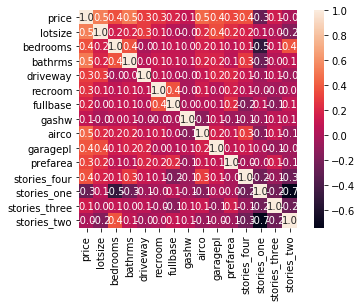

In [0]:
import seaborn as sns
sns.heatmap(df.corr(),square=True,annot=True,fmt=".1f")

In [0]:
# create a list of independent variables
independent_variables=[ 'lotsize', 'bedrooms', 'bathrms','driveway',
       'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea',"stories_four","stories_one","stories_three","stories_two" ]
                                                                                                     

independent_variables             

['lotsize',
 'bedrooms',
 'bathrms',
 'driveway',
 'recroom',
 'fullbase',
 'gashw',
 'airco',
 'garagepl',
 'prefarea',
 'stories_four',
 'stories_one',
 'stories_three',
 'stories_two']

In [0]:
# VIF Variance Inflation Factor
# It is an indicator of multicollinearity
# https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html

from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[independent_variables]
y = df['price']

thresh = 10  # It's an indicator of VIF

for i in np.arange(0,len(independent_variables)):
  vif = [variance_inflation_factor(X[independent_variables].values , ix)
  for ix in range(X[independent_variables].shape[1])]
  maxloc = vif.index(max(vif))
  if max(vif) > thresh:
    print('vif : ',vif)
    print('dropping :',X[independent_variables].columns[maxloc],'index :',maxloc)
    del independent_variables[maxloc]
  else:
    break

print("Final Indpendent Variables : ",independent_variables)

vif :  [1.3704738112004569, 1.578326825971881, 1.2987779728705593, 1.1648811574651847, 1.2148620093192928, 1.3369114662383517, 1.053078869775805, 1.2195823546735252, 1.218832929061305, 1.181239434106175, 4.544836339845972, 11.781465345739338, 3.943698568447546, 17.220894903652624]
dropping : stories_two index : 13
vif :  [9.027672411240845, 12.40877864989557, 9.374682124313615, 6.79426994395169, 1.4753724454932144, 2.055797712632684, 1.103128332756141, 1.785054332017555, 1.9607784997238857, 1.5317205065647905, 1.4546157757803124, 1.8969940907498246, 1.278600527923588]
dropping : bedrooms index : 1
Final Indpendent Variables :  ['lotsize', 'bathrms', 'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea', 'stories_four', 'stories_one', 'stories_three']


In [0]:
independent_variables_final= ['lotsize', 'bathrms', 'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea', 'stories_four', 'stories_one', 'stories_three']
X=df[independent_variables_final]
y=df["price"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=1)
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

X_train shape (436, 12)
X_test shape (110, 12)
y_train shape (436,)
y_test shape (110,)


In [0]:
!pip install -U statsmodels

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.6/dist-packages (0.11.0)


In [0]:
!pip install--upgrade Cython

ERROR: unknown command "install--upgrade" - maybe you meant "install"


In [0]:
import statsmodels.api as sm
lm=sm.OLS(y_train,X_train).fit()

In [0]:
lm.summary()

In [0]:
# Predict House Prices 

independent_variables

['lotsize',
 'bathrms',
 'driveway',
 'recroom',
 'fullbase',
 'gashw',
 'airco',
 'garagepl',
 'prefarea',
 'stories_four',
 'stories_one',
 'stories_three']

In [0]:
import joblib

In [0]:
joblib.dump(lm,"house_price.pkl")

['house_price.pkl']

In [0]:
import sys
import joblib
lm=joblib.load("house_price.pkl")
lotsize = int(sys.argv[1])
bathrms = int(sys.argv[2])
driveway = int(sys.argv[3])
recroom = int(sys.argv[4])
fullbase = int(sys.argv[5])
gashw = int(sys.argv[6])
airco = int(sys.argv[7])
garagepl = int(sys.argv[8])
prefarea = int(sys.argv[9])
stories_four = int(sys.argv[10])
stories_one = int(sys.argv[11])
stories_three = int(sys.argv[12])


# Convert these inputs in Dictionary 

dict1 = {'lotsize':lotsize , 'bathrms':bathrms , 'driveway':driveway,'recroom':recroom,
        'fullbase':fullbase , 'gashw':gashw , 'airco':airco,
        'garagepl':garagepl , 'prefarea':prefarea, 'stories_four':stories_four,
        'stories_one':stories_one , 'stories_three':stories_three}

df_input = pd.DataFrame(dict1, index=[0], columns=['lotsize','bathrms','driveway','recroom',
                                                  'fullbase','gashw',
                                                  'airco','garagepl','prefarea',
                                                  'stories_four','stories_one',
                                                  'stories_three'])

df_input

In [0]:
lotsize = int(input('Enter Lotsize : '))
bathrms = int(input('Enter Bathrooms : '))
driveway = int(input('Enter Driveway : '))
recroom = int(input('Enter Recroom : '))
fullbase = int(input('Enter fullbase : '))
gashw = int(input('Enter GasHotWater : '))
airco = int(input('Enter AirCondition : '))
garagepl = int(input('Enter Garage place : '))
prefarea = int(input('Enter Prefarea : '))
stories_four = int(input('Enter Story Four : '))
stories_one = int(input('Enter Story One : '))
stories_three = int(input('Enter Story Three : '))


# Convert these inputs in Dictionary 

dict1 = {'lotsize':lotsize , 'bathrms':bathrms , 'driveway':driveway,'recroom':recroom,
        'fullbase':fullbase , 'gashw':gashw , 'airco':airco,
        'garagepl':garagepl , 'prefarea':prefarea, 'stories_four':stories_four,
        'stories_one':stories_one , 'stories_three':stories_three}

df_input = pd.DataFrame(dict1, index=[0], columns=['lotsize','bathrms','driveway','recroom',
                                                  'fullbase','gashw',
                                                  'airco','garagepl','prefarea',
                                                  'stories_four','stories_one',
                                                  'stories_three'])

df_input

Enter Lotsize : 500
Enter Bathrooms : 2
Enter Driveway : 1
Enter Recroom : 0
Enter fullbase : 1
Enter GasHotWater : 0
Enter AirCondition : 1
Enter Garage place : 1
Enter Prefarea : 0
Enter Story Four : 1
Enter Story One : 0
Enter Story Three : 0


,lotsize,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_four,stories_one,stories_three
0,500,2,1,0,1,0,1,1,0,1,0,0


In [0]:
predict_price = lm.predict(df_input)
print ('Predicted Price Of House Is : ',predict_price[0])

Predicted Price Of House Is :  89722.09081085036


In [0]:
# Accuracy 
y_train_predict = lm.predict(X_train)

from sklearn.metrics import r2_score

print ("Accuracy : ",r2_score(y_train ,y_train_predict))

Accuracy :  0.6683760711168004


In [0]:
# OLS --> Ordinary Least Square 

lm = sm.OLS(y_train,X_train).fit()
print (lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              760.6
Date:                Thu, 20 Feb 2020   Prob (F-statistic):                   5.22e-278
Time:                        04:07:20   Log-Likelihood:                         -4819.9
No. Observations:                 436   AIC:                                      9664.
Df Residuals:                     424   BIC:                                      9713.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [0]:
independent_variables = ['lotsize', 'bathrms', 'driveway', 
                          'fullbase', 'gashw',
                         'airco', 'garagepl', 'prefarea', 
                         'stories_four', 'stories_one', 
                         'stories_three']

X = df[independent_variables]
y = df['price']

# Train / Test Dataset

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,train_size=.80,random_state=1)

print ("X_train",X_train.shape)
print ("X_test",X_test.shape)
print ("y_train",y_train.shape)
print ("y_test",y_test.shape)

X_train (436, 11)
X_test (110, 11)
y_train (436,)
y_test (110,)


In [0]:
lm = sm.OLS(y_train,X_train).fit()
print (lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              828.0
Date:                Thu, 20 Feb 2020   Prob (F-statistic):                   4.34e-279
Time:                        04:07:33   Log-Likelihood:                         -4820.8
No. Observations:                 436   AIC:                                      9664.
Df Residuals:                     425   BIC:                                      9708.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [0]:
# Accuracy 
y_train_predict = lm.predict(X_train)

from sklearn.metrics import r2_score

print ("Accuracy : ",r2_score(y_train ,y_train_predict))

Accuracy :  0.6669710966728543
